# Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. 
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

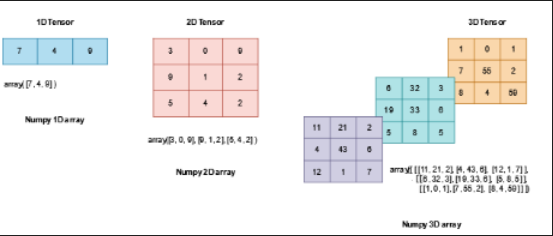![image.png](attachment:image.png)

Tensors are similar to `NumPy’s`ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory address, eliminating the need to copy data will a capability called `bridge-to-np-label`. Tensors are also optimized for automatic differentiation (we'll see more about that later in the Autograd unit). If you’re familiar with `ndarrays`, you’ll be right at home with the Tensor API. If not, follow along!

Let's start by setting up our environment.

In [ ]:
%matplotlib inline
import torch
import numpy as np

# Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:

## Directly from data

Tensors can be created directly from data. The data type is automatically inferred.



In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

## From a NumPy array

Tensors can be created from NumPy arrays and vice versa.  Since, numpy _'np_array'_ and tensor _'x_np'_ share the same memory location here, changing the value for one will change the other.  

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



## From another tensor:

The new tensor retains the properties (shape, data type) of the argument tensor, unless explicitly overridden.



In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5510, 0.8081],
        [0.6921, 0.2363]]) 



## With random or constant values:

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.  Shape shows the number of rows and columns in the tensor.  E.g. shape = (# of rows, # of columns).



In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7645, 0.5959, 0.3746],
        [0.1725, 0.0752, 0.7105]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


# Attributes of a Tensor

Tensor attributes describe their shape, data type, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Operations on Tensors

There are more than 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing). For sampling and reviewing, you'll find a comprehensive description [here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU).
- CPUs have up to 16 cores. Cores are units that do the actual computation. Each core processes tasks in a sequential order (one task at a time).
- GPUs have 1000s of cores.  GPU cores handle computations in parallel processing. Tasks are divided and processed across the different cores. That's what makes GPUs faster than CPUs in most cases. GPUs perform better with large data than small data. GPU are typically used for high-intensive computation of graphics or neural networks (we'll learn more about that later in the Neural Network unit).
- PyTorch can use the Nvidia CUDA library to take advantage of their GPU cards.

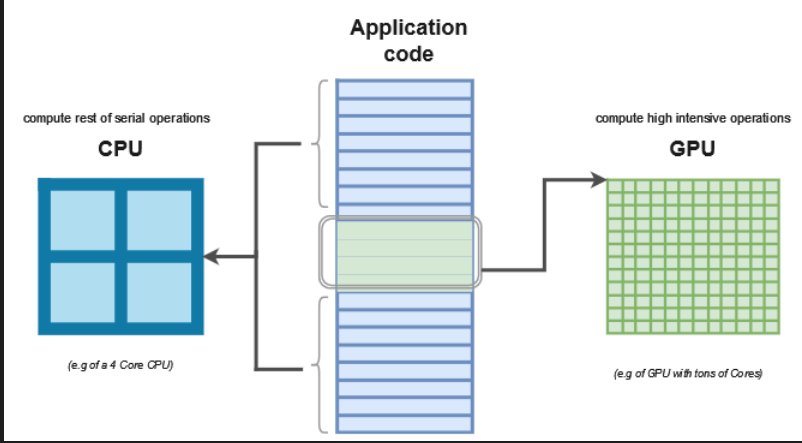

By default, tensors are created on the CPU. Tensors can also be computed to GPUs; to do that, you need to move them using the `.to` method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [ ]:
tensor.device

device(type='cuda', index=0)

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.

## Standard numpy-like indexing and slicing:

In [ ]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## Joining tensors
You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.
`torch.stack` is another tensor joining option that is subtly different from ``torch.cat``.



In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


## Arithmetic operations



In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

## Single-element tensors
If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using `item()`:



In [ ]:
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


## In-place operations
Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix. 
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

> **Note:** In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.



In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.

### Tensor to NumPy array

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor

In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.



In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Datasets and Dataloaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of sample pre-loaded datasets (such as FashionMNIST) that subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data. They can be found and used as samples for prototyping and benchmarking your model here: 
- Image Datasets
- Text Datasets
- Audio Datasets

## Loading a dataset

We will be loading the **_Fashion-MNIST_** dataset from TorchVision.  Fashion-MNIST is a dataset of Zalando’s article images consisting of of 60,000 training examples and 10,000 test examples.  Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.  

 - Each image is 28 pixels in height and 28 pixels in width, with a total of 784 pixels
 - The 10 classes tell what type of image it is. For example: T-shirt/top, Trouser, Pullover, Dress, Bag, Ankle boot etc.
 - The grayscale are values between 0 to 255 that measure the intensity of black and white images.  The intensity value increase from white to black. For example:  a white color will be 0, while a black color will 255.
 
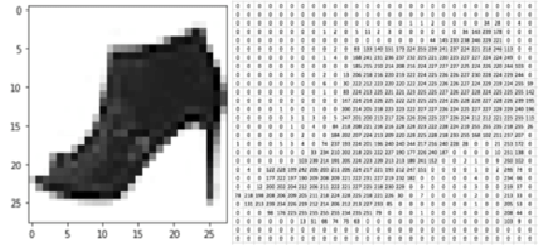


We load the FashionMNIST Dataset with the following parameters:
 - **root** is the path where the train/test data is stored,
 - **train** specifies training or test dataset,
 - **download=True** downloads the data from the Internet if it's not available at `root`.
 - **transform** and `target_transform` specify the feature and label transformations

In [ ]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``. 
We use ``matplotlib`` to visualize some samples in our training data.

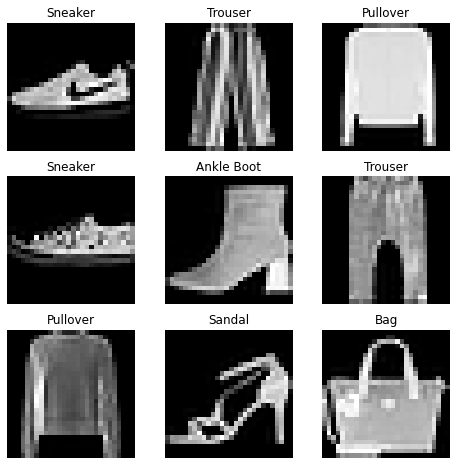

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Preparing your data for training with DataLoaders
-------------------------------------------------
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to 
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to
speed up data retrieval.

In machine learning, you need to specify what the feature and label are in your dataset. **Features** are input and **labels** are output.  We train use features and train the model to predict the label.

  - Labels are what 10 class types:  T-shirt, Sandal, Dress etc
  - Features are the patterns in the images pixels

The ``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.  We use the Dataloader, we need to set the following paraments:
 - **data** the training data that will be used to train the model; and test data to evaluate the model
 - **batch size** the number of records to be processed in each batch
 - **shuffle** the randoms sample of the data by indices


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have loaded that dataset into the `Dataloader` and can iterate through the dataset as needed.
Each iteration below returns a batch of `train_features` and `train_labels`(containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over  the data loading order.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


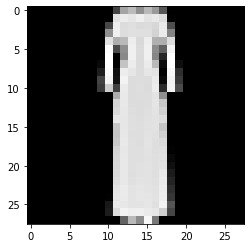

Label: 3


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Normalization

Normalization is a common data pre-processing technique that is applied to scale or transform the data to make sure there's an equal learning contribution from each feature.  For example, each pixel in the grayscale images have a value between 0 and 255, which are features.   If one pixel value is 17 and another pixel is 197. There will be an uneven distribution of the pixel importance, because the higher pixel volumes will deviate the learning. Normalization changes the range of your data, without distorting its distintion among out feature.  This pre-processing is to avoid:

- A reduction of the prediction accuracy 
- Difficulty for the model to learn
- Unfavorable distribution of the feature data ranges

## Transforms

Data does not always come in its final processed form that is required for 
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters (`transform` to modify the features and
`target_transform` to modify the labels) that accept callables containing the transformation logic. The `torchvision.transforms` module offers 
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors.
To make these transformations, we use `ToTensor` and `Lambda`.

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## ToTensor()

`ToTensor` converts a PIL image or NumPy `ndarray` into a `FloatTensor` and scales the image's pixel intensity values in the range \[0., 1.\]

## Lambda transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function 
to turn the integer into a one-hot encoded tensor. 
It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter which assigns a 
_value=1_ on the index as given by the label _y_. You can also use `torch.nn.functional.one_hot` as another option to do that.

In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# What is a neural network

Neural network is a collection of neurons that are connected by layers. Each neuron is a small
computing unit that performs simple calculations to collectively solve a problem. They are 
organized in layers. There are 3 types of layers: input layer, hidden layer and 
outter layer.  Each layer contains a number of neurons, except for the input layer. Neural networks mimic the way a human brain processes information.
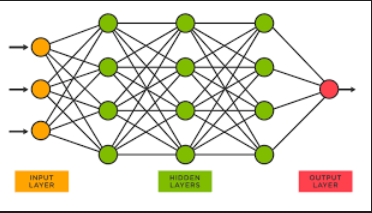

## Components of a neural network

- **Activation function** determines whether a neuron should be activated or not. The computations that happen in a neural network include applying an activation function. If a neuron activates, then it means the input is important.  The are different kinds of activation functions. The choice of which activation function to use depends on what you want the output to be. Another important role of an activation function is to add non-linearity to the model.
    - _Binary_ used to set an output node to 1 if function result is positive and 0 if the function result is negative. $f(x)= {\small \begin{cases} 0, & \text{if } x < 0\\ 1, & \text{if } x\geq 0\\ \end{cases}}$
    - _Sigmod_ is used to predict the probability of an output node being between 0 and 1.  $f(x) = {\large \frac{1}{1+e^{-x}}} $
    - _Tanh_ is used to predict if an output node is between 1 and -1.  Used in classification use cases.  $f(x) = {\large \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}} $
    - _ReLU_ used to set the output node to 0 if fuction result is negative and keeps the result value if the result is a positive value.  $f(x)= {\small \begin{cases} 0, & \text{if } x < 0\\ x, & \text{if } x\geq 0\\ \end{cases}}$
- **Weights** influence how well the output of our network will come close to the expected output value. As an input enters the neuron, it gets multiplied by a weight value and the resulting output is either observed, or passed to the next layer in the neural network. Weights for all neurons in a layer are organized into one tensor
- **Bias** makes up the difference between the activation function's output and its intended output. A low bias suggest that the network is making more assumptions about the form of the output, whereas a high bias value makes less assumptions about the form of the output. 

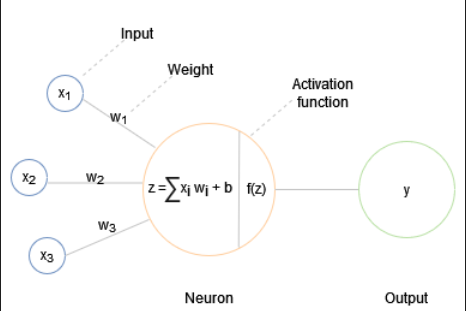

We can say that an output $y$ of a neural network layer with weights $W$ and bias $b$ is computed as summation of the inputs multiply by the weights plus the bias $x = \sum{(weights * inputs) + bias} $, where $f(x)$ is the activation function.

# Build a neural network

Neural networks are comprised of layers/modules that perform operations on data. 
The `torch.nn` namespace provides all the building blocks you need to 
build your own neural network. Every module in PyTorch subclasses the `nn.Module`. 
A neural network is a module itself that consists of other modules (layers). This nested structure allows for
building and managing complex architectures easily.

In the following sections, we'll build a neural network to classify images in the FashionMNIST dataset.

In [ ]:
%matplotlib inline
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Get a hardware device for training

We want to be able to train our model on a hardware accelerator like the GPU, if it is available. Let's check to see if 
`torch.cuda` is available, else we continue to use the CPU.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


## Define the class

We define our neural network by subclassing `nn.Module`, and 
initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements
the operations on input data in the `forward` method.

Our neural network are composed of the following:
- The input layer with 28x28 or 784 features/pixels.
- The first linear module takes the input 784 features and transforms it to a hidden layer with 512 features
- The ReLU activation function will be applied in the transformation
- The second linear module take 512 features as input from the first hidden layer and transforms it to the next hidden layer with 512 features
- The ReLU activation function will be applied in the transformation
- The third linear module take 512 features as input from the second hidden layer and transforms it to the output layer with 10, which is the number of classes
- The ReLU activation function will be applied in the transformation

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`, and print 
it's structure.



In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


To use the model, we pass it the input data. This executes the model's `forward`, along with some background operations. However, do not call `model.forward()` directly! Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class.

We get the prediction densities by passing it through an instance of the `nn.Softmax`.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X) 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3], device='cuda:0')


In [ ]:
logits

tensor([[0.0000, 0.0310, 0.0588, 0.1364, 0.0000, 0.0047, 0.0292, 0.0000, 0.0000,
         0.0181]], device='cuda:0', grad_fn=<ReluBackward0>)

## Weight and Bias


The `nn.Linear` module randomly initializes the ${weights}$  and ${ bias}$ for each layer and internally stores the values in Tensors.

In [ ]:
print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")

print(f"First Linear weights: {model.linear_relu_stack[0].bias} \n")

First Linear weights: Parameter containing:
tensor([[ 0.0218,  0.0240, -0.0001,  ...,  0.0041, -0.0266,  0.0242],
        [ 0.0150, -0.0277,  0.0213,  ..., -0.0031, -0.0296,  0.0284],
        [-0.0128,  0.0346, -0.0139,  ..., -0.0045, -0.0112,  0.0299],
        ...,
        [-0.0131,  0.0276, -0.0185,  ..., -0.0203,  0.0176,  0.0061],
        [-0.0068,  0.0301,  0.0286,  ..., -0.0338,  0.0089, -0.0088],
        [-0.0102, -0.0107,  0.0263,  ..., -0.0029, -0.0079, -0.0344]],
       requires_grad=True) 

First Linear weights: Parameter containing:
tensor([-0.0087, -0.0254,  0.0274, -0.0121, -0.0322, -0.0077,  0.0017, -0.0220,
        -0.0015, -0.0219,  0.0118, -0.0055, -0.0080, -0.0056,  0.0086, -0.0035,
        -0.0157,  0.0239, -0.0095,  0.0273,  0.0147, -0.0282,  0.0210,  0.0176,
        -0.0317, -0.0319, -0.0024,  0.0338,  0.0001,  0.0103, -0.0114,  0.0098,
         0.0297, -0.0320,  0.0267,  0.0356,  0.0119,  0.0032, -0.0013,  0.0308,
         0.0251,  0.0072, -0.0312,  0.0018,  0.02

In [ ]:
model.linear_relu_stack[0].weight.shape

torch.Size([512, 784])

## Model layers

Let's break down the layers in the FashionMNIST model. To illustrate it, we 
will take a sample minibatch of 3 images of size **28x28** and see what happens to it as 
we pass it through the network. 

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

We initialize the `nn.Flatten` layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values (the minibatch dimension (at dim=0) is maintained). Each of the pixels are pass to the input layer of the neural network.  

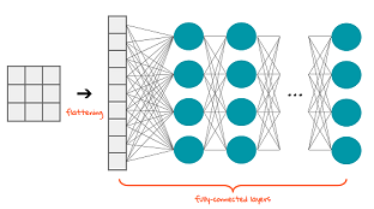

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear 

The linear layer is a module that applies a linear transformation on the input using it's stored weights and biases.  The gayscale value of each pixel in the input layer will be connected to neurons in the hidden layer for calculation.    The calculation used for the transformation is ${{weight * input + bias}} $.


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

Non-linear activations are what create the complex mappings between the model's inputs and outputs.
They are applied after linear transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena. In this model, we use `nn.ReLU` between our linear layers, but there's other activations to introduce non-linearity in your model.

The ReLU activation function takes the output from the linear layer calculation and replaces the negative values with zeros.

Linear output: ${ x = {weight * input + bias}} $.  
ReLU:  $f(x)= 
\begin{cases}
    0, & \text{if } x < 0\\
    x, & \text{if } x\geq 0\\
\end{cases}
$

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0137, -0.1065, -0.1874,  0.1475, -0.0878,  0.3957,  0.2342,  0.0302,
         -0.1383,  0.1624,  0.1542, -0.1666, -0.1364,  0.0223, -0.2475,  0.3717,
          0.5917,  0.2421, -0.0671, -0.3954],
        [-0.0960, -0.1370, -0.0896, -0.0919,  0.1719,  0.1622,  0.1465,  0.1223,
          0.1645, -0.0201,  0.3850, -0.1589, -0.4394,  0.0495, -0.5087,  0.4291,
          0.6194,  0.4159, -0.1308, -0.2857],
        [ 0.0583, -0.6735,  0.0586,  0.2120,  0.0374,  0.0981,  0.2670, -0.3099,
         -0.0111, -0.1171, -0.2001, -0.3938, -0.4772, -0.0624, -0.4676,  0.6389,
          0.7661,  0.1279, -0.0822, -0.2700]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0137, 0.0000, 0.0000, 0.1475, 0.0000, 0.3957, 0.2342, 0.0302, 0.0000,
         0.1624, 0.1542, 0.0000, 0.0000, 0.0223, 0.0000, 0.3717, 0.5917, 0.2421,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1719, 0.1622, 0.1465, 0.1223, 0.1645,
         0.0000, 0.3850, 0.0000, 0.0000, 0.0495, 0.00

### nn.Sequential

`nn.Sequential` is an ordered 
container of modules. The data is passed through all the modules in the same order as defined. You can use
sequential containers to put together a quick network like `seq_modules`.

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax

The last linear layer of the neural network returns `logits` - raw values in \[`-infty`, `infty`], which are passed to the
`nn.Softmax` module. The Softmax activation function is used to calculate the probability of the output from the neural network.  It is only used on the output layer of a neural network.  The results are scaled to values \[0, 1\] representing the model's predicted densities for each class. `dim` parameter indicates the dimension along which the result values must sum to 1.  The node with the highest probability predicts the desired output.

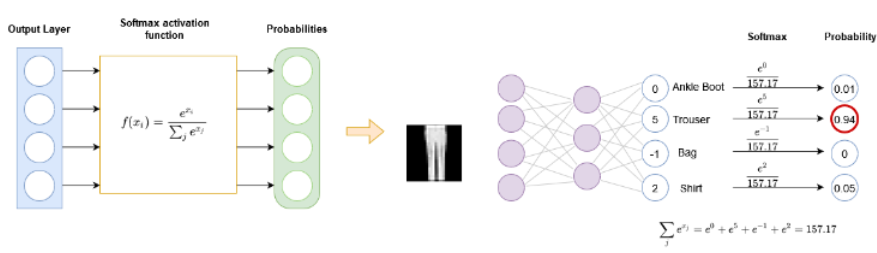

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## Model parameters

Many layers inside a neural network are *parameterized*, i.e. have associated weights 
and biases that are optimized during training. Subclassing `nn.Module` automatically 
tracks all fields defined inside your model object, and makes all parameters 
accessible using your model's `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.


In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0104,  0.0009, -0.0232,  ..., -0.0187, -0.0051, -0.0007],
        [ 0.0283,  0.0288,  0.0318,  ..., -0.0348,  0.0267, -0.0356]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0030,  0.0025], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0141, -0.0428, -0.0014,  ...,  0.0150, -0.0418,  0.0311],
        [ 0.0425,  0.0045, -0.0380,  ..., -0.0230, -0.0373, -0.0420]],
       grad_fn=<SliceBackward0>) 

Layer: linear_re

--------------




## Automatic differentiation with ``torch.autograd``

When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.  The loss function calulates the difference between the expected output and the actual output that a neural network produces.  The goal is to get the result of the loss function as close to zero as possible.  The algorithm traverse backwards through the network network to adjust the weights and bias to retrain the model. That's why it's called back propagation. This back and forward process of retraining the model over time to reduce the loss to 0 is called the gradient descent.

To compute those gradients, PyTorch has a built-in differentiation engine
called `torch.autograd`. It supports automatic computation of gradient for any
computational graph.

Consider the simplest one-layer neural network, with input `x`,
parameters `w` and `b`, and some loss function. It can be defined in
PyTorch in the following manner:

In [ ]:
%matplotlib inline
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tensors, Functions and Computational graph

This code defines the following **computational graph**:

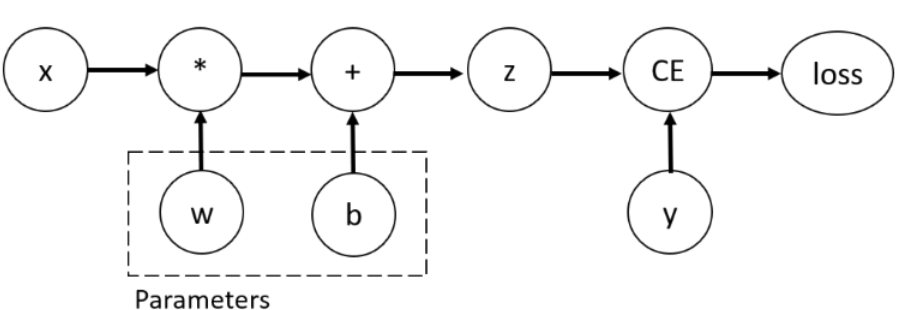![image.png](attachment:image.png)

In this network, `w` and `b` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the `requires_grad` property of those tensors.

> **Note:** You can set the value of `requires_grad` when creating a tensor, or later by using `x.requires_grad_(True)` method.

A function that we apply to tensors to construct computational graph is
in fact an object of class `Function`. This object knows how to
compute the function in the *forward* direction, and also how to compute
its derivative during the *backward propagation* step. A reference to
the backward propagation function is stored in `grad_fn` property of a
tensor. 

In [ ]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7fb8c4dff2e0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fb8c4dff760>


## Computing gradients

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
`x` and `y`. To compute those derivatives, we call
`loss.backward()`, and then retrieve the values from `w.grad` and
`b.grad`:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0878, 0.0665, 0.0857],
        [0.0878, 0.0665, 0.0857],
        [0.0878, 0.0665, 0.0857],
        [0.0878, 0.0665, 0.0857],
        [0.0878, 0.0665, 0.0857]])
tensor([0.0878, 0.0665, 0.0857])


> **Note:** We can only obtain the `grad` properties for the leaf nodes of the computational graph, which have `requires_grad` property set to ``True``. For all other nodes in our graph, gradients will not be available. In addition, we can only perform gradient calculations using ``backward`` once on a given graph, for performance reasons. If we need to do several ``backward`` calls on the same graph, we need to pass ``retain_graph=True`` to the ``backward`` call.

## Disabling gradient tracking

By default, all tensors with `requires_grad=True` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
`torch.no_grad()` block:

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the ``detach()`` method
on the tensor:




In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:
  - To mark some parameters in your neural network at **frozen parameters**. This is
    a very common scenario for fine tuning a pre-trained network.
  - To **speed up computations** when you are only doing forward pass, because computations on tensors that do
    not track gradients would be more efficient.



Notice that when we call `backward` for the second time with the same
argument, the value of the gradient is different. This happens because
when doing `backward` propagation, PyTorch **accumulates the
gradients**, i.e. the value of computed gradients is added to the
`grad` property of all leaf nodes of computational graph. If you want
to compute the proper gradients, you need to zero out the `grad`
property before. In real-life training an *optimizer* helps us to do
this.



> **Note:** previously we were calling `backward()` function without parameters. This is equivalent to calling `backward(torch.tensor(1.0))`, which is a useful way to compute the gradients in case of a scalar-valued function, such as loss during neural network training.



--------------




# Optimizing the model parameters

Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration (called an *epoch*). The model makes a guess about the output, calculates the error in its guess (*loss*), collects the derivatives of the error with respect to its parameters (as we saw in the previous module), and **optimizes** these parameters using gradient descent. 

## Prerequisite code 

We will load the code from the previous modules on **Datasets & DataLoaders** and **Build Model**

In [ ]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## Setting hyperparameters 

Hyperparameters are adjustable parameters that let you control the model optimization process. 
Different hyperparameter values can impact model training and the level of accuracy.

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times the entire training dataset is pass through the network. 
 - **Batch Size** - the number of data samples seen by the model in each epoch. Iterates are the number of batches needs to compete an epoch.
 - **Learning Rate** - the size of steps the model match as it searchs for best weights that will produce a higher model accuracy. Smaller values means the model will take a longer time to find the best weights, while larger values may result in the model step over and misses the best weights which yields unpredictable behavior during training.

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Add an optimization loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each 
iteration of the optimization loop is called an **epoch**. 

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to 
see the `full-impl-label` of the optimization loop.

### Add a loss function

When presented with some training data, our untrained network is likely not to give the correct 
answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, 
and it is the loss function that we want to minimize during training. To calculate the loss we make a 
prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include:
- `nn.MSELoss` (Mean Square Error) used for regression tasks
- `nn.NLLLoss` (Negative Log Likelihood) used for classification
- `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`

We pass our model's output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimization pass

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent).
All optimization logic is encapsulated in  the ``optimizer`` object. Here, we use the SGD optimizer; additionally, there are many different optimizers
available in PyTorch such as `ADAM' and 'RMSProp`, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.



In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:
 * Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Back-propagate the prediction loss with a call to `loss.backwards()`. PyTorch deposits the gradients of the loss w.r.t. each parameter. 
 * Once we have our gradients, we call ``optimizer.step()`` to adjust the parameters by the gradients collected in the backward pass.

## Full implementation

We define `train_loop` that loops over our optimization code, and `test_loop` that 
evaluates the model's performance against our test data.

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to `train_loop` and `test_loop`.
Feel free to increase the number of epochs to track the model's improving performance.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304765  [    0/60000]
loss: 2.300172  [ 6400/60000]
loss: 2.291083  [12800/60000]
loss: 2.293436  [19200/60000]
loss: 2.280010  [25600/60000]
loss: 2.264736  [32000/60000]
loss: 2.271383  [38400/60000]
loss: 2.245579  [44800/60000]
loss: 2.254056  [51200/60000]
loss: 2.262743  [57600/60000]
Test Error: 
 Accuracy: 35.4%, Avg loss: 0.035286 

Epoch 2
-------------------------------
loss: 2.239373  [    0/60000]
loss: 2.248792  [ 6400/60000]
loss: 2.210736  [12800/60000]
loss: 2.236308  [19200/60000]
loss: 2.207680  [25600/60000]
loss: 2.179645  [32000/60000]
loss: 2.201830  [38400/60000]
loss: 2.146896  [44800/60000]
loss: 2.176553  [51200/60000]
loss: 2.195960  [57600/60000]
Test Error: 
 Accuracy: 37.6%, Avg loss: 0.033991 

Epoch 3
-------------------------------
loss: 2.151490  [    0/60000]
loss: 2.173357  [ 6400/60000]
loss: 2.093899  [12800/60000]
loss: 2.151567  [19200/60000]
loss: 2.093314  [25600/60000]
loss: 2.050480  [32000/600

You may have noticed that the model is initially not very good (that's OK!). Try running the loop for more `epochs` or adjusting the `learning_rate` to a bigger number. It might also be the case that the model configuration we chose might not be the optimal one for this kind of problem (it isn't). Later courses will delve more into the model shapes that work for vision problems.


Saving Models
-------------

When you are satisfied with the model's performance, you can use `torch.save` to save it. PyTorch models store the learned parameters in an internal state dictionary, called `state_dict`. These can be persisted wit the `torch.save` method:

In [ ]:
torch.save(model.state_dict(), "data/model.pth")

print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


This unit runs through the API for common tasks in machine learning. Refer to the links in each section to dive deeper.

## Working with data
PyTorch has two primitives to work with data: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``. ``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around the ``Dataset``.



In [ ]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

PyTorch offers domain-specific libraries such as `TorchText`, `TorchVision`, and `TorchAudio`, all of which include datasets. For this tutorial, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like CIFAR and COCO. In this tutorial, we'll use the **FashionMNIST** dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and ``target_transform`` to modify the samples and labels respectively.

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.



Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


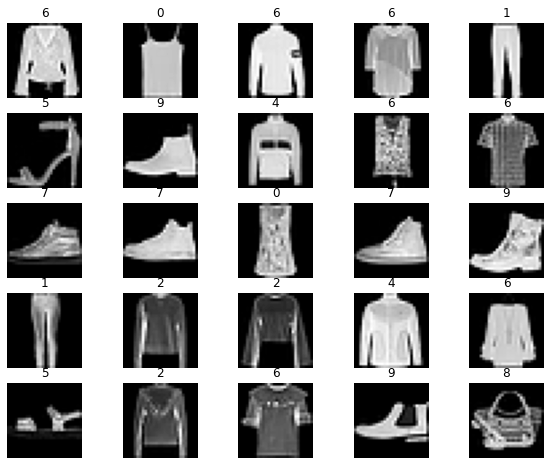

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break
    
# Display sample data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating models
To define a neural network in PyTorch, we create a class that inherits from `nn.Module`. We define the layers of the network in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate operations in the neural network, we move it to the GPU if available.



In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


## Optimizing the Model Parameters
To train a model, we need a loss function and an optimizer.  We'll be using `nn.CrossEntropyLoss` for loss and `Stochastic Gradient Descent` for optimization.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and back-propagates the prediction error to adjust the model's parameters. 



In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We can also check the model's performance against the test dataset to ensure it is learning.


In [ ]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the accuracy increase and the loss decrease with every epoch.



In [ ]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300167  [    0/60000]
loss: 2.296543  [ 6400/60000]
loss: 2.287112  [12800/60000]
loss: 2.286987  [19200/60000]
loss: 2.282292  [25600/60000]
loss: 2.268228  [32000/60000]
loss: 2.280948  [38400/60000]
loss: 2.264891  [44800/60000]
loss: 2.238155  [51200/60000]
loss: 2.241701  [57600/60000]
Test Error: 
 Accuracy: 36.6%, Avg loss: 0.034989 

Epoch 2
-------------------------------
loss: 2.232546  [    0/60000]
loss: 2.223522  [ 6400/60000]
loss: 2.191302  [12800/60000]
loss: 2.203542  [19200/60000]
loss: 2.163817  [25600/60000]
loss: 2.161679  [32000/60000]
loss: 2.194097  [38400/60000]
loss: 2.152668  [44800/60000]
loss: 2.123596  [51200/60000]
loss: 2.127904  [57600/60000]
Test Error: 
 Accuracy: 51.6%, Avg loss: 0.032863 

Epoch 3
-------------------------------
loss: 2.114414  [    0/60000]
loss: 2.079938  [ 6400/60000]
loss: 2.011179  [12800/60000]
loss: 2.052618  [19200/60000]
loss: 1.954779  [25600/60000]
loss: 1.980868  [32000/600

The accuracy will initially not be very good (that's OK!). Try running the loop for more `epochs` or adjusting the `learning_rate` to a bigger number. It might also be the case that the model configuration we chose might not be the optimal one for this kind of problem (it isn't). Later courses will delve more into the model shapes that work for vision problems.

Saving Models
-------------
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).



In [ ]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Loading Models
----------------------------

The process for loading a model includes re-creating the model structure and loading
the state dictionary into it. 



In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("data/model.pth"))

FileNotFoundError: ignored

This model can now be used to make predictions.



In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[63][0], test_data[63][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Sandal"
